# Тема: Шкалирование признака

Шкалирование (нормализация) признаков - приведение признаков к одному масштабу, как правило, от 0 до 1 или от -1 
до 1. 
Шкалирование относится к методам предобработки данных. Его необходимо производить в связи с тем, что многие 
алгоритмы машинного обучения лучше работают, когда все признаки имеют одну шкалу измерения. 
А для алгоритмов, которые работают независимо от масштаба признаков, хуже от нормализации обычно не становится. 
Нормализация применяется только к числовым признакам.
Существует целый ряд методов шкалирования. Рассмотрим два из них.

Загрузим данные в ноутбук:

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Выберем числовые признаки, которые будем шкалировать:

In [2]:
data=df[['Pclass','Age','Fare']]

In [3]:
data.describe()

,Pclass,Age,Fare
count,891.000000,714.000000,891.000000
mean,2.308642,29.699118,32.204208
std,0.836071,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,2.000000,20.125000,7.910400
50%,3.000000,28.000000,14.454200
75%,3.000000,38.000000,31.000000
max,3.000000,80.000000,512.329200


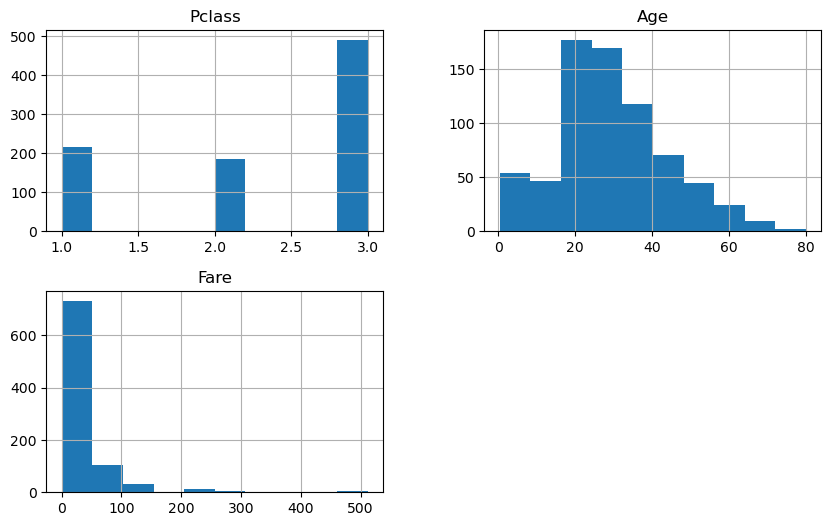

In [4]:
df[['Pclass','Age','Fare']].hist(figsize=(10,6));

## minmax нормализация

Одним из стандартных способов нормализации является `minmax` нормализация, которая приводит каждый признак к значению между 0 и 1.  
Для каждого признака алгоритм находит минимальное ($x_{min}$) и максимальное ($x_{max}$) значение, после этого признак `x` трансформируется по формуле: $$x := \frac{x - x_{min}}{x_{max} - x_{min}}$$

Посмотрим на работу метода нормализации `MinMaxScaler` из библиотеки `sklearn`.

In [5]:
from sklearn.preprocessing import MinMaxScaler

Прежде чем применять MinMaxScaler избавимся от значений NaN у признака и заменим эти значения, например, на нули.

In [6]:
data = data.fillna(0)

Класс `MinMaxScale` имеет метод `fit` для вычисления минимального и максимального значения признака и метод 
`transform` для шкалирования признака. Можно выполнить обе этих операции сразу так `fit_transform`:

In [7]:
scaler = MinMaxScaler()
data_scaler=scaler.fit_transform(data)
print(data_scaler)

[[1.         0.275      0.01415106]
 [0.         0.475      0.13913574]
 [1.         0.325      0.01546857]
 ...
 [1.         0.         0.04577135]
 [0.         0.325      0.0585561 ]
 [1.         0.4        0.01512699]]


## std нормализация (стандартная нормализация)

`std` нормализация (иначе называется `стандартная нормализация` или `zero mean, unit variance`) - еще один вид нормализации признаков.  
Для каждого признака алгоритм независимо находит среднее значение ($x_{mean}$) и стандартное отклонение ($x_{std}$), после этого признак `x` трансформируется по формуле: $$x := \frac{x - x_{mean}}{x_{std}}$$

Посмотрим на работу метода нормализации `StandardScaler` из библиотеки `sklearn`.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[ 0.82737724, -0.10231279, -0.50244517],
       [-1.56610693,  0.80749164,  0.78684529],
       [ 0.82737724,  0.12513832, -0.48885426],
       ...,
       [ 0.82737724, -1.35329389, -0.17626324],
       [-1.56610693,  0.12513832, -0.04438104],
       [ 0.82737724,  0.46631498, -0.49237783]])

На вход у этих методов подаём `pandas.DataFrame`, на выходе будем получать `np.ndarray`. Информация о структуре `pandas`-таблицы теряется.